In [1]:
%pylab inline
import ThonkTools as TT
from uncertainties import ufloat
from scipy import interpolate
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Daten einlesen
def read (path,offset=2, *kwargs):
    from numpy import array as array
    doc = []
    with open (path, 'r') as myfile:
        data = myfile.read().replace(',', '.').replace('\n', ',').replace('  ', ',').replace("\t",",")
        datarray = data.split(',')
        output = []
    for item in datarray:
        if item != '':
            output.append(int(item))
    dataset = array(output[offset:])
    dataset = [array(range(len(dataset))), dataset]
    return dataset

## Read data from Am

In [3]:
am_left = read("Am_2_2.TKA")
am_right = read("Am_1.TKA")
#plt.figure(figsize=(11.7, 8.3), dpi=300)


## Fit 59.5 keV peak

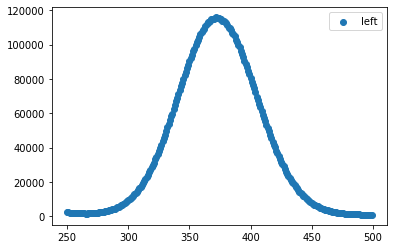

In [4]:
start,end = 250,500
plt.scatter(am_left[0][start:end], am_left[1][start:end], label="left")
#plt.scatter(am_right[0],am_right[1], label="right")
plt.legend()
plt.show()

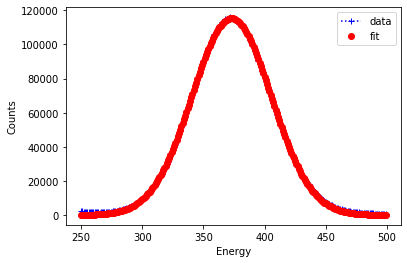

In [5]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_left[0][start:end]
y = am_left[1][start:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),x[y.argmax(axis=0)],(end-start)])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

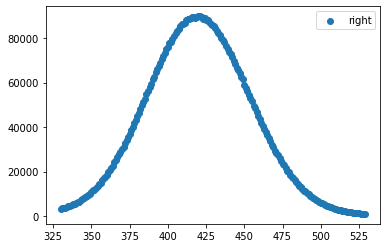

In [6]:
start,end = 330,530
#plt.scatter(am_left[0][start:end], am_left[1][start:end], label="left")
plt.scatter(am_right[0][start:end],am_right[1][start:end], label="right")
plt.legend()
plt.show()

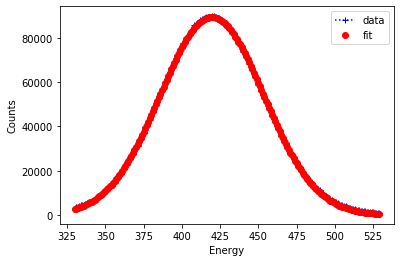

In [7]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

def gaus(x,a,x0,sigma):
    return a*exp(-(x-x0)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,x,y,p0=[max(y),x[y.argmax(axis=0)],(end-start)])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

## 26.3 keV and 33.2 keV fits

In [8]:
def double_gaus(x,a_1,x0_1,sigma_1,a_2, x0_2, sigma_2):
    return gaus(x,a_1,x0_1,sigma_1)+ gaus(x,a_2, x0_2, sigma_2)

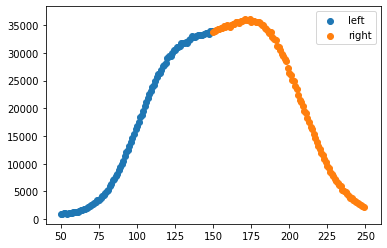

In [9]:
start,middle,end = 50,150,250
plt.scatter(am_left[0][start:middle], am_left[1][start:middle], label="left")
plt.scatter(am_left[0][middle:end],am_left[1][middle:end], label="right")
plt.legend()
plt.show()

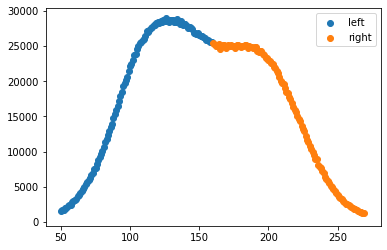

In [10]:
start,middle,end = 50,160,270
plt.scatter(am_right[0][start:middle],am_right[1][start:middle], label="left")
plt.scatter(am_right[0][middle:end],  am_right[1][middle:end], label="right")
plt.legend()
plt.show()

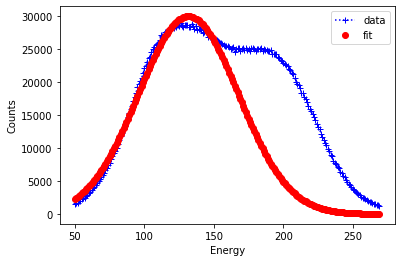

In [11]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

x_2left=am_right[0][start:middle]
y_2left=am_right[1][start:middle]

x_2right=am_right[0][middle:end]
y_2right=am_right[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      25000,150,30]

popt,pcov = curve_fit(gaus,x_2left,y_2left,p0=guess[:3])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

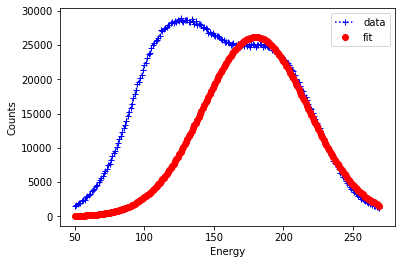

In [12]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x = am_right[0][start:end]
y = am_right[1][start:end]

x_2left=am_right[0][start:middle]
y_2left=am_right[1][start:middle]

x_2right=am_right[0][middle:end]
y_2right=am_right[1][middle:end]

n = len(x)                          
mean = sum(x*y)/n                   
sigma = sum(y*(x-mean)**2)/n        

guess=[30000,70,30,
      35000,120,30]

popt1,pcov = curve_fit(gaus,x_2right,y_2right,p0=guess[3:])

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt1),"ro",label="fit")
#plt.plot(x,gaus(x,max(y),x[y.argmax(axis=0)], 25))
plt.legend()
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.show()

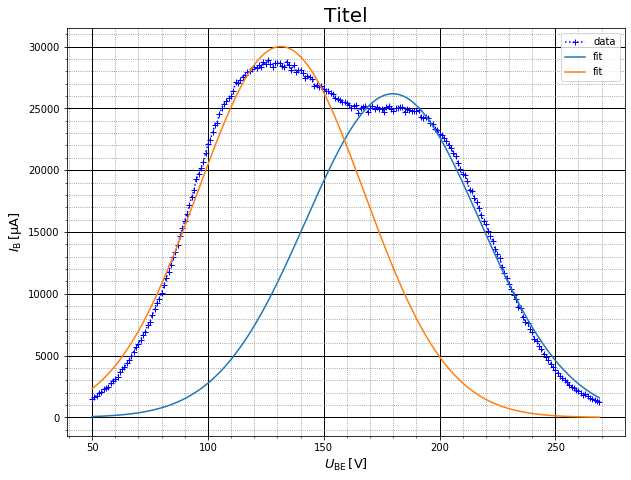

In [13]:
### FigureSize

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 7.5
plt.rcParams["figure.figsize"] = fig_size

###   Errors / Fit / Plot

plt.plot(x,y,'b+:',label='data')
plt.plot(x,gaus(x,*popt1) ,label="fit")
plt.plot(x,gaus(x,*popt) ,label="fit")

###   Label / Title

plt.xlabel(r'$U_\mathrm{BE}\,[\mathrm{V}]$', fontsize=13)
plt.ylabel(r'$I_\mathrm{B}\,[\mathrm{µA}]$', fontsize=13)
plt.title('Titel', fontsize=20)

###   Axes / Grid

axes = plt.gca()  ##  Searches current Axes

#axes.set_xlim([0,0.8])
#axes.set_ylim([-1,110])

#axes.set_yticks([0,10,20,30,40,50,60,70,80,90,100,110])
#axes.set_xticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])

axes.grid(which='major', linestyle='-', linewidth='1', color='black')
axes.grid(which='minor', linestyle=':', color='gray')
axes.minorticks_on()

plt.legend()
#plt.savefig('Dateiname.png')
plt.show()